# Laboratorio 4 Centralidad y Distribuciones

En este laboratorio utilizaremos la librería Networkx para ejemplificar las medidas de centralidad vistas en clases, junto con comenzar el estudio de las distribuciones de cierto atributo en un grafo.


Contenidos:

1.   Degree centrality.
2.   Closeness centrality.
3.   Betweenness centrality.
4.   Distribución de un atributo.
5.   Heterogeneidad de Grados

In [1]:
import networkx as nx
%matplotlib inline

# Cargamos un grafo desde sus aristas

 Veamos el grafo de correos electrónicos ejecutivos de Enron, obtenido desde [Base de datos](https://raw.githubusercontent.com/CambridgeUniversityPress/FirstCourseNetworkScience/master/datasets/ia-enron-only/ia-enron-only.edges). El archivo se guardará en `/content` si estas trabajando en Colab.




In [2]:
import requests
import os
from utils.paths import DATA_RAW_DIR

In [3]:


# URL del archivo comprimido en GitHub
url = "https://raw.githubusercontent.com/CambridgeUniversityPress/FirstCourseNetworkScience/master/datasets/ia-enron-only/ia-enron-only.edges"
response = requests.get(url)
# Carpeta de destino para la descarga
download_folder = DATA_RAW_DIR
filename = 'ia-enron-only.edges'
# Guardar el archivo
with open(os.path.join(download_folder, filename), 'wb') as file:
    file.write(response.content)

G = nx.read_edgelist(os.path.join(download_folder, filename), nodetype=int)

nx.draw(G)
print("Cantidad de Nodos:", len(G.nodes))
print("Cantidad de Aristas:", len(G.edges))

Cantidad de Nodos: 143
Cantidad de Aristas: 623


#Medidas de Centralidad

##Degree centrality

Intuitivamente en una red social, alguien que posee una mayor cantidad de amigos podría considerarse más importante en la red. Es por esto que estudiar los nodos con mayor grados de conexión nos proporciona información importante acerca del grafo.

In [4]:
highest_degree_node = max(G.nodes, key=G.degree)
degree_highest = G.degree(highest_degree_node)
print("El Nodo", highest_degree_node, " tiene mayor grado, con ", degree_highest, " vecinos.")


El Nodo 105  tiene mayor grado, con  42  vecinos.


También podemos obtener los nodos con mayor grado ordenandolos de mayor a menor, a continuación se muestran los 10 nodos con más conexiones. Con sus respectivos grados.

In [5]:
high_degree_nodes = sorted(G.nodes, key=G.degree, reverse  = True)[:10]
list(G.degree(high_degree_nodes))

[(105, 42),
 (17, 30),
 (95, 23),
 (48, 20),
 (132, 19),
 (43, 19),
 (31, 18),
 (74, 18),
 (91, 18),
 (72, 17)]

## Closeness centrality.
En muchas ocasiones, el grafo contiene una noción de distancia asociada a las aristas. Es el caso redes de transporte, donde las aristas representan calles de una ciudad, o redes sociales donde las aristas representan la distancia social entre dos nodos. En este tipo de redes, la noción de cercanía permite identificar a los nodos más importantes como aquellos más cercanos al resto.

La función `nx.closeness_centrality` nos entrega esta medida para todos los nodos del grafo en un diccionario.

In [6]:
closeness = nx.closeness_centrality(G)
# Podemos buscar los 10 valores más grandes
sorted(closeness.items(), key=lambda x: x[1], reverse=True)[:10]

[(105, 0.5),
 (17, 0.47019867549668876),
 (95, 0.4382716049382716),
 (74, 0.4369230769230769),
 (37, 0.4369230769230769),
 (48, 0.43558282208588955),
 (91, 0.43425076452599387),
 (43, 0.4316109422492401),
 (72, 0.42900302114803623),
 (22, 0.4251497005988024)]

## Betweenness centrality.

La noción de “betweenness centrality” se basa en los caminos más cortos que ocurren dentro de un grafo.

La función `nx.betweenness_centrality` nos entrega esta medida para todos los nodos del grafo en un diccionario.

In [7]:
betweenness = nx.betweenness_centrality(G)
# Podemos buscar los 10 valores más grandes
sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:10]

[(105, 0.19400604344556296),
 (17, 0.11088210445609471),
 (48, 0.09673142009207425),
 (91, 0.09118959870866389),
 (32, 0.08554735598477585),
 (95, 0.07579595400584722),
 (141, 0.06345441275176905),
 (22, 0.05846852533268458),
 (72, 0.05833907970763193),
 (51, 0.05199434696409222)]

# Distribuciones de centralidad


Hemos encontrado el nodo más central en la red, pero a menudo queremos resumir información sobre la centralidad de todos los nodos. Por ejemplo, además del grado máximo, a menudo queremos la media y/o mediana en una red.

El primer paso para resumir esta información es obtener una secuencia de todos los valores de centralidad en el grafo. Ya no nos importan los nombres de los nodos, solo queremos una secuencia de números. Podemos empezar con el ejemplo del grado:



In [8]:
degree_sequence = [G.degree(n) for n in G.nodes]

Para obtener la media y la mediana de esta secuencia, podemos usar el módulo de estadísticas incorporado de Python:


In [9]:
import statistics

print('Promedio degree:', statistics.mean(degree_sequence))
print('Mediana degree:', statistics.median(degree_sequence))
print('Desviación Estandar degree:', statistics.stdev(degree_sequence))

Promedio degree: 8.713286713286713
Mediana degree: 8
Desviación Estandar degree: 6.076533455824283


De la misma manera con esta secuencia de grados podemos realiar un histograma para comprender de mejor manera la forma de la distribución muestral de los grados.

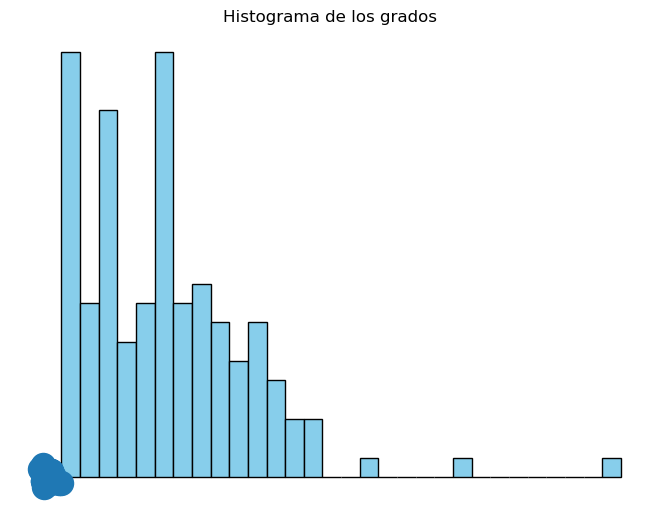

In [10]:
import matplotlib.pyplot as plt

# Plot de un histograama
plt.hist(degree_sequence, bins=30, color='skyblue', edgecolor='black')

# Colocar Título y nombre de los ejes.
plt.xlabel('Grados')
plt.ylabel('Frequencia')
plt.title('Histograma de los grados')

# Display the plot
plt.show()

## Distribución de Closeness centrality

Tal como se realizó con la medida de centralidad basada en los grados se puede realizar con la medida Closeness.



Promedio Closeness: 0.34633756774358165
Mediana Closeness: 0.3506172839506173
Desviación estandar Closeness: 0.053359487090919235


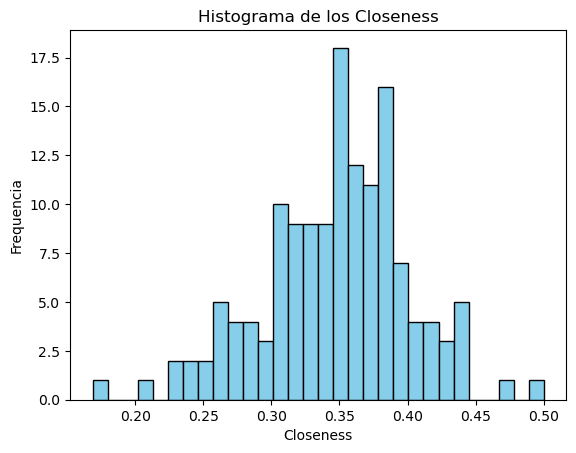

In [11]:
closeness_sequence = list(nx.closeness_centrality(G).values())

print('Promedio Closeness:', statistics.mean(closeness_sequence))
print('Mediana Closeness:', statistics.median(closeness_sequence))
print('Desviación estandar Closeness:', statistics.stdev(closeness_sequence))
# Plot de un histograama
plt.hist(closeness_sequence, bins=30, color='skyblue', edgecolor='black')

# Colocar Título y nombre de los ejes.
plt.xlabel('Closeness')
plt.ylabel('Frequencia')
plt.title('Histograma de los Closeness')

# Display the plot
plt.show()

## Distribución de Betweeness centrality

Promedio betweenness: 0.013950388838012454
Mediana betweenness: 0.0037492834763570323
Desviación estandar betweenness: 0.02561568117258256


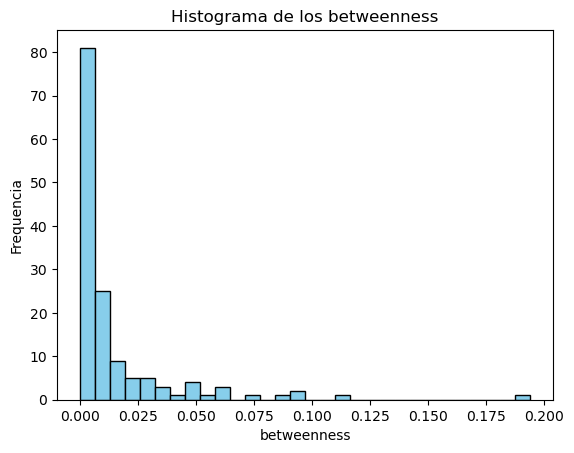

In [12]:
betweenness_sequence = list(nx.betweenness_centrality(G).values())

print('Promedio betweenness:', statistics.mean(betweenness_sequence))
print('Mediana betweenness:', statistics.median(betweenness_sequence))
print('Desviación estandar betweenness:', statistics.stdev(betweenness_sequence))
# Plot de un histograama
plt.hist(betweenness_sequence, bins=30, color='skyblue', edgecolor='black')

# Colocar Título y nombre de los ejes.
plt.xlabel('betweenness')
plt.ylabel('Frequencia')
plt.title('Histograma de los betweenness')

# Display the plot
plt.show()

# Heterogeneidad de Grados
Aun cuando las distribuciones contienen toda la información de los atributos de un grafo, en ocasiones, algunas medidas nos permiten comprender rápidamente el comportamiento de los atributos de un grafo sin necesariamente acceder a toda la información.

Recordemos que la heterogeneidad de grados se calcula como el promedio del cuadrado de los grados dividido por el cuadrado del promedio de grados. Dicha función no esta creada exactamente en la libreria networkx pero no tiene mayor dificultad.
Utilizamos la librería numpy para convertir la lista en un vector y de esta manera realizar operaciones de forma más sencilla.

In [13]:
import numpy as np

def Het(G):
  degree_sequence = np.array([G.degree(n) for n in G.nodes])
  return statistics.mean(degree_sequence**2)/statistics.mean(degree_sequence)**2

Ahora utilizamos la función de Heterogeneidad de grados en nuestro grafo.
La heterogeneidad se interpreta como una medida del peso de las colas de una distribución. De esta manera, si el valor es cercano a 1 significa que no hay mucha variación en la distribución de los grados

In [14]:
Het(G)

np.float64(1.75)

Naturalmente, podemos extender la heterogeneidad a cualquier atributo de interés como la razón entre el promedio de cuadrado de los valores del atributo y el cuadrado del promedio del atributo en cuestión.